In [1]:
#importing libraries needed 

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.visualization import plot_distribution


In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)



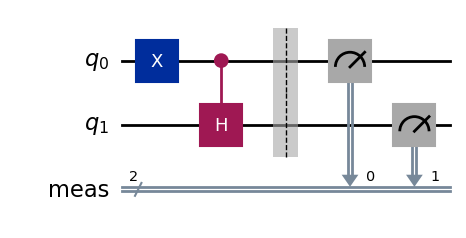

In [3]:
#initializing  quantum circuit



qc = QuantumCircuit(2)   #2 qubits


qc.x(0)

qc.ch(0,1)

qc.measure_all() #qubit measurement

qc.draw("mpl")

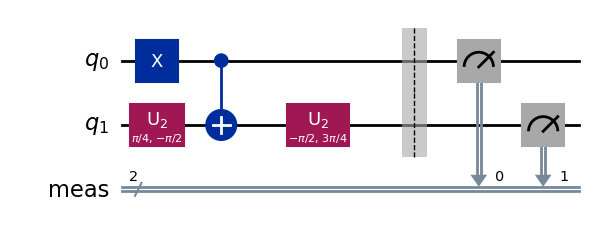

In [4]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

    #Drawing the trasnpiled circuit
    

#print("\n Circuit Bell states 1 transpiled\n")
qct.draw("mpl")



#print(circuit)

In [5]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results  


counts


{'01': 504, '11': 496}

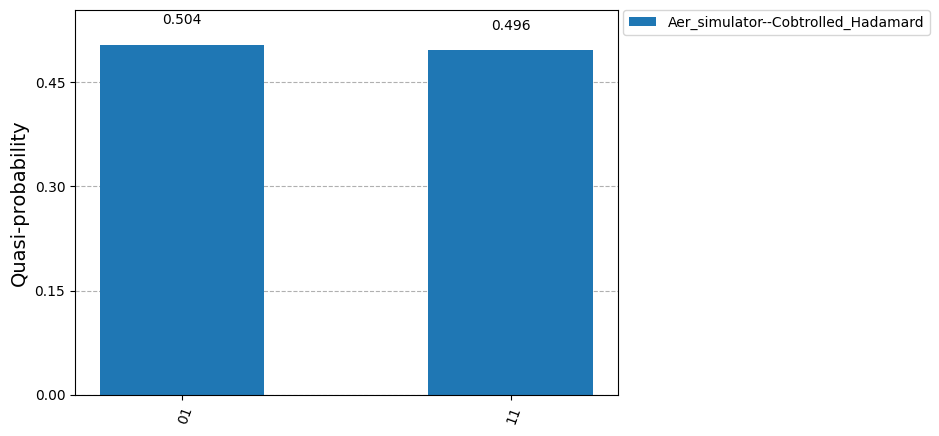

In [6]:
plot_distribution([counts], legend = ['Aer_simulator--Cobtrolled_Hadamard'])